In [1]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

Missing colon in file WindowsPath('d:/ProgramData/Anaconda3/envs/learn-ml/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('<!-- #font.family:  sans-serif -->')
Missing colon in file 'd:\\ProgramData\\Anaconda3\\envs\\learn-ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 256 ('<!-- #font.family:  sans-serif -->')


In [2]:
data = load_boston()

d:\ProgramData\Anaconda3\envs\learn-ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [3]:
data = load_boston()
#波士顿数据集非常简单，但它所涉及到的问题却很多
X = data.data
y = data.target

In [4]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [5]:
reg = XGBR(n_estimators=100).fit(Xtrain,Ytrain)
reg.predict(Xtest) #传统接口predict

array([ 6.6689262, 22.34918  , 31.052807 , 13.911595 ,  9.467966 ,
       22.658588 , 14.514282 , 15.092699 , 15.293644 , 12.680115 ,
       24.140797 , 35.890083 , 21.573483 , 27.07066  , 19.052658 ,
        9.89033  , 23.386076 , 23.588493 , 23.311466 , 22.401644 ,
       18.98444  , 15.766946 , 25.8352   , 20.193802 , 19.982517 ,
       15.611423 , 22.883228 , 29.838228 , 22.815304 , 16.779037 ,
       37.13194  , 20.133305 , 19.67352  , 23.525528 , 22.845137 ,
       23.87397  , 15.17887  , 23.45934  , 16.685331 , 31.761686 ,
       18.525843 , 22.441063 , 38.48728  , 17.93719  , 15.10122  ,
       28.980541 , 46.363487 , 12.842797 ,  9.618281 , 35.40579  ,
       25.657566 , 20.605602 , 20.800055 , 49.228447 , 31.355848 ,
       29.382515 , 18.911947 , 21.049877 , 16.165182 , 18.098577 ,
       14.659002 , 21.720213 , 19.413454 , 28.932102 , 30.573524 ,
       19.228426 , 20.531511 , 15.666289 , 23.52929  , 19.30554  ,
       28.384985 , 42.83562  , 29.429724 , 23.306015 , 19.7412

In [6]:
reg.score(Xtest,Ytest) #r2

0.9050988968414799

In [7]:
MSE(Ytest,reg.predict(Xtest))

8.830916343629323

In [8]:
reg.feature_importances_
#树模型的优势之一：能够查看模型的重要性分数，可以使用嵌入法进行特征选择

array([0.01902167, 0.0042109 , 0.01478316, 0.00553537, 0.02222196,
       0.37914088, 0.01679686, 0.0469872 , 0.04073574, 0.05491759,
       0.06684221, 0.00869464, 0.3201119 ], dtype=float32)

In [9]:
reg = XGBR(n_estimators=100)
cross_val_score(reg,Xtrain,Ytrain,cv=10).mean()  #r2

0.7883239724129787

In [10]:
# 查看所有评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [11]:
#使用随机森林和线性回归进行一个对比
rfr = RFR(n_estimators=100)
cross_val_score(rfr,Xtrain,Ytrain,cv=5).mean()

0.8001303356360445

In [12]:
cross_val_score(rfr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-16.432472696257555

In [13]:
lr = LinearR()
cross_val_score(lr,Xtrain,Ytrain,cv=5).mean()

0.6835070597278087

In [14]:
cross_val_score(lr,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-25.349507493648424

In [15]:
#开启参数slient：在数据巨大，预料到算法运行会非常缓慢的时候可以使用这个参数来监控模型的训练进度
reg = XGBR(n_estimators=10,verbosity=1)
cross_val_score(reg,Xtrain,Ytrain,cv=5,scoring='neg_mean_squared_error').mean()

-18.633733952333067

In [16]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                     ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                 ,shuffle=True
                                                 ,cv=cv
                                                 # ,random_state=420
                                                 ,n_jobs=n_jobs)
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
                 , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
        , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

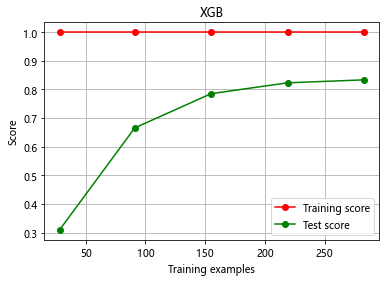

In [17]:
cv = KFold(n_splits=5, shuffle = True, random_state=42)
plot_learning_curve(XGBR(n_estimators=100,random_state=420)
             ,"XGB",Xtrain,Ytrain,ax=None,cv=cv)
plt.show()

160 0.8320776498992342


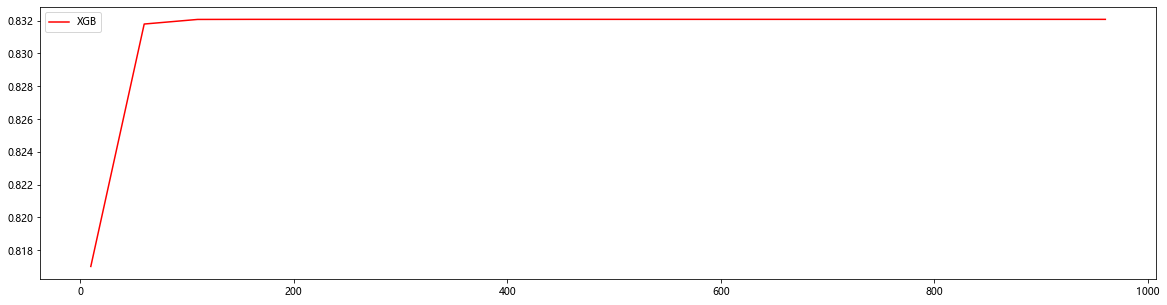

In [20]:
#=====【TIME WARNING：25 seconds】=====#
axisx = range(10,1010,50)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929 0.03353716440826495


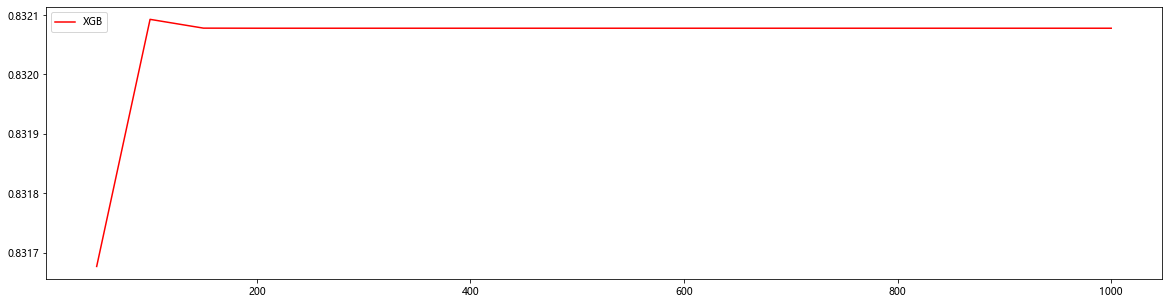

In [21]:
#======【TIME WARNING: 20s】=======#
axisx = range(50,1050,50)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,Ytrain,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929
100 0.8320924293483107 0.005344212126112929 0.03353716440826495


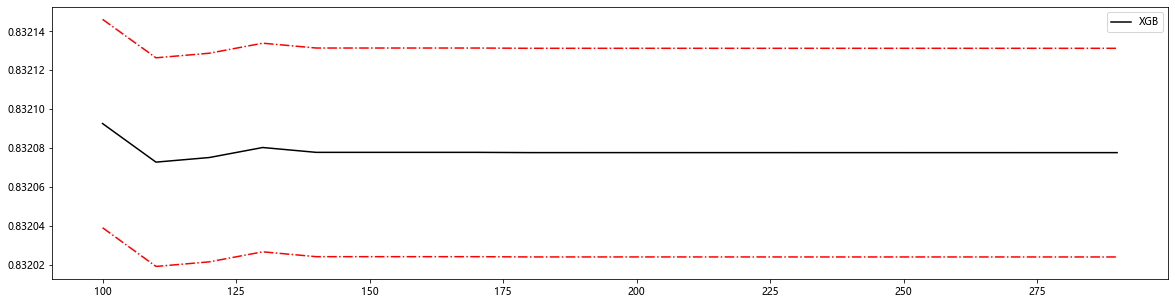

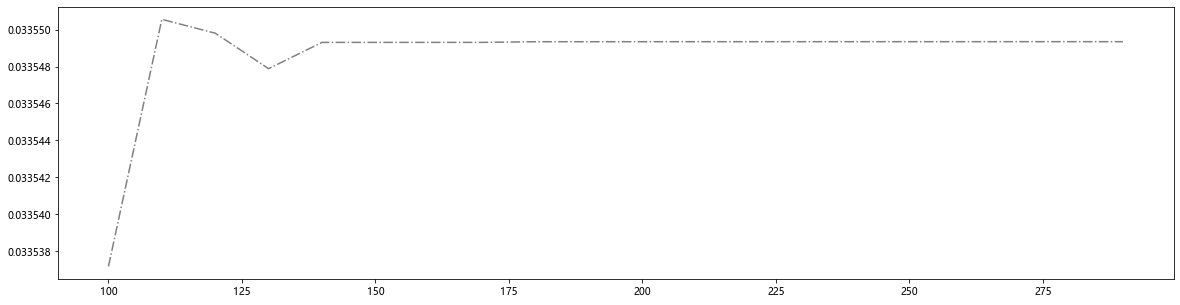

In [22]:
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()
#看看泛化误差的可控部分如何？
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [23]:
#验证模型效果是否提高了？
time0 = time()
print(XGBR(n_estimators=100,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)
time0 = time()
print(XGBR(n_estimators=660,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)
time0 = time()
print(XGBR(n_estimators=180,random_state=420).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time()-time0)

0.9050988968414799
0.04983878135681152
0.9050526026617368
0.14760494232177734
0.9050526026617368
0.07280516624450684


1.0 0.8320775188717384


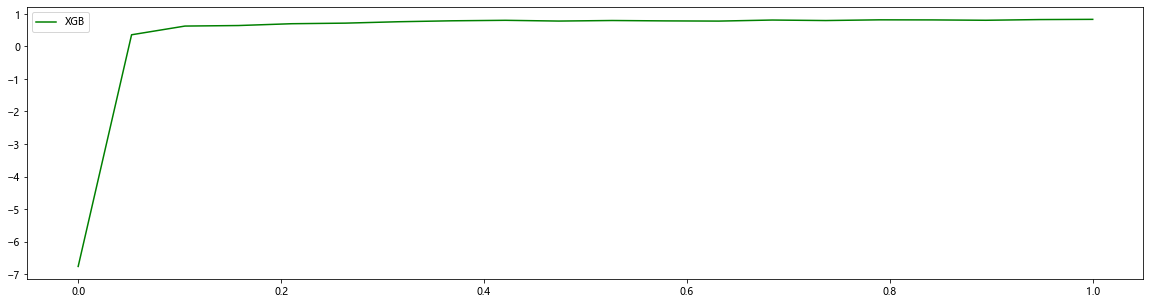

1.0 0.8320775188717384 0.005351387286069266
0.75 0.8173343503953288 0.0026743863585713006
1.0 0.8320775188717384 0.005351387286069266 0.033549346954340635


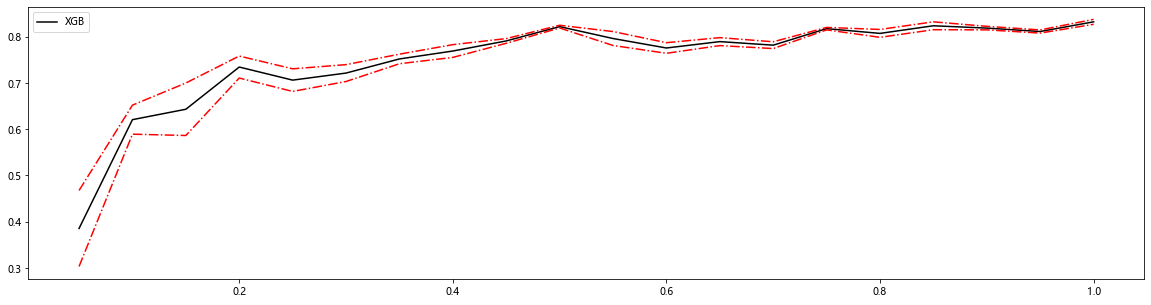

In [26]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    rs.append(cross_val_score(reg,Xtrain,Ytrain,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()
#细化学习曲线
axisx = np.linspace(0.05,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=180,subsample=i,random_state=420)
    cvresult = cross_val_score(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [28]:
#继续细化学习曲线
axisx = np.linspace(0.75,1,25)
#不要盲目找寻泛化误差可控部分的最低值，注意观察结果
#看看泛化误差的情况如何
reg = XGBR(n_estimators=180
            ,subsample=0.7708333333333334
            ,random_state=420).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)
MSE(Ytest,reg.predict(Xtest))

9.103002897056138

In [30]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i]
                             ,cross_val_score(reg
                                 ,Xtrain,Ytrain
                                 ,cv=cv,scoring=scoring[i]).mean()))
        score.append(cross_val_score(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [31]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

r2:0.79
neg_mean_squared_error:-14.12


[0.7944643540243173, -14.116785296679888]

In [32]:
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)

[0.7944643540243173, -14.116785296679888]

In [33]:
#观察一下eta如何影响我们的模型：
from time import time
import datetime
for i in [0,0.2,0.5,1]:
    time0=time()
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    print("learning_rate = {}".format(i))
    regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning_rate = 0
r2:-6.76
neg_mean_squared_error:-567.55
00:01:233698
	
learning_rate = 0.2
r2:0.83
neg_mean_squared_error:-12.30
00:01:474057
	
learning_rate = 0.5
r2:0.82
neg_mean_squared_error:-12.48
00:00:990652
	
learning_rate = 1
r2:0.71
neg_mean_squared_error:-20.06
00:00:827302
	


0.1 0.8354667578172856


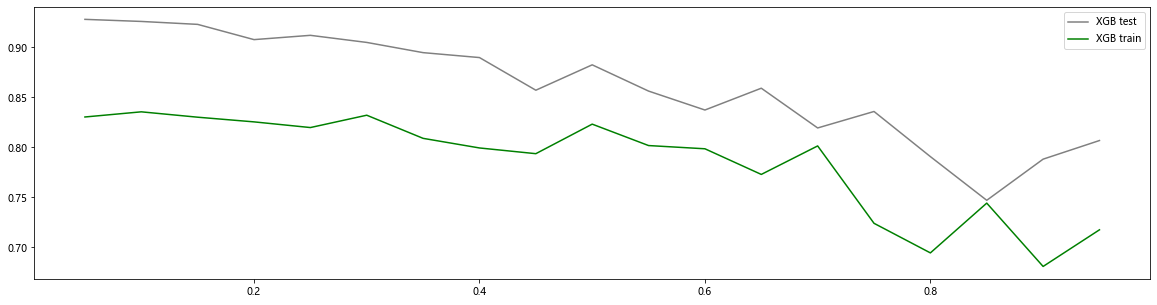

In [36]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=180,random_state=420,learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="XGB test")
plt.plot(axisx,rs,c="green",label="XGB train")
plt.legend()
plt.show()